This notebook is for training softmax regression, the code resides in **softmax_digits.py**. Algorithm is implemented in **softmax_example.py and nnbase.py**. nnbase can be adapted for variety of neural network types. 
The data comes from MNIST dataset, specifically https://www.kaggle.com/c/digit-recognizer. We have in total 42000 images encoded in 28x28 grayscale matrix. test set size is 28000. Solution right now has accuracy - 0.912

In [1]:
%load_ext autotime
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
sns.set(color_codes=True)
plt.rcParams['savefig.dpi'] = 100

from IPython.display import display

for f in os.listdir('../input'):
    print(f.ljust(30) + str(round(os.path.getsize('../input/' + f) / 1000000, 2)) + 'MB')


from softmax_digits import *

.DS_Store                     0.0MB
test.csv                      51.0MB
train.csv                     76.0MB
Soft limit starts as  : 9223372036854775807
Soft limit changed to : 2024000000
time: 1.07 s


In [53]:
# read and preprocess data, see softmax_digits.py
(X_train, y_train, X_dev, y_dev, X_test, y_test, X_fulltest) = get_data(num_train=40000, 
        num_dev=1000, num_test=1000)

Soft limit starts as  : 2024000000
Soft limit changed to : 2024000000
X_train shape (40000, 784)
X_dev shape (1000, 784)
X_test shape (1000, 784)
time: 9.8 s


In [5]:
# Here we try different batch size strategies
nepoch = 5
sz = len(y_train)
print 'Training data size is', sz
N = nepoch * len(y_train)
k = 8 # minibatch size

random.seed(10)
def epoch_sch():
    for i in xrange(nepoch):
        for j in xrange(sz):
            yield j

def rand_sch():
    for i in xrange(N):
        yield random.randint(0, sz)

def rand_minibatch(n, k):
    # minibatch with size k
    for _ in xrange (n / k):
        yield [random.randint(0, sz) for _ in xrange(k)]


Training data size is 40000
time: 20 ms


In [45]:
sr = SoftmaxRegression(wv=zeros_like(X_train), dims=(784, 10), alpha=0.0001, reg=0.001)
curve = sr.train_sgd(X_train, y_train, rand_minibatch(500000, 16), costevery=2000, devX=X_dev, devy=y_dev)

Begin SGD...
  Seen 0 in 0.00 s
  [0]: mean train loss 3.01903 mean valid loss 3.05237
  [2000]: mean train loss 0.507443 mean valid loss 0.534396
  [4000]: mean train loss 0.41336 mean valid loss 0.431532
  [6000]: mean train loss 0.376265 mean valid loss 0.394057
  [8000]: mean train loss 0.35401 mean valid loss 0.370783
  Seen 10000 in 20.85 s
  [10000]: mean train loss 0.339771 mean valid loss 0.35885
  [12000]: mean train loss 0.329393 mean valid loss 0.350208
  [14000]: mean train loss 0.321395 mean valid loss 0.343615
  [16000]: mean train loss 0.314683 mean valid loss 0.338602
  [18000]: mean train loss 0.309679 mean valid loss 0.337222
  Seen 20000 in 41.72 s
  [20000]: mean train loss 0.30561 mean valid loss 0.329494
  [22000]: mean train loss 0.301682 mean valid loss 0.331052
  [24000]: mean train loss 0.297993 mean valid loss 0.328711
  [26000]: mean train loss 0.294839 mean valid loss 0.325922
  [28000]: mean train loss 0.292419 mean valid loss 0.326294
  Seen 30000 in 63.

In [46]:
counts, costs, costdevs  = zip(*curve)

time: 14.2 ms


In [47]:
# plot train and dev errors

time: 13.8 ms


Soft limit starts as  : 2024000000
Soft limit changed to : 2024000000


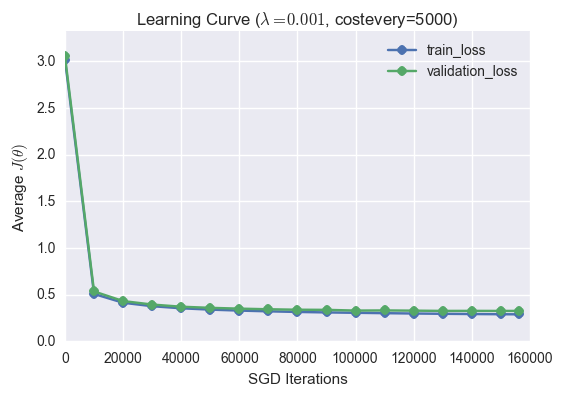

time: 393 ms


In [52]:
plt.figure(figsize=(6,4))

plt.plot(5*array(counts), costs, color='b', marker='o', linestyle='-', label=r"train_loss")
plt.plot(5*array(counts), costdevs, color='g', marker='o', linestyle='-', label=r"validation_loss")

plt.title(r"Learning Curve ($\lambda=0.001$, costevery=5000)")
plt.xlabel("SGD Iterations"); plt.ylabel(r"Average $J(\theta)$"); 
plt.ylim(ymin=0, ymax=max(1.1*max(costs),3*min(costs)));
plt.legend()
#plt.show()

In [49]:
accuracy_test = np.count_nonzero(sr.predict(X_test) == y_test) / double(len(y_test))
print 'accuracy on test', accuracy_test

accuracy on test 0.911
time: 48.5 ms


In [50]:
# generate prediction for full data set
y_fulltest = sr.predict(X_fulltest)

time: 906 ms


In [51]:
def write_to_fle(pred, fn):
    ''' write file in csv format'''
    df = pd.DataFrame()
    df["ImageId"] = range(1, len(pred) + 1)
    df["Label"] = pred
    df.to_csv("../output/" + fn, index=False)
write_to_fle(y_fulltest, "softmax_res.csv")

time: 56.4 ms
